<a href="https://colab.research.google.com/github/Devbrat-Singh/Image_Classification/blob/main/DogsVsCats_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive


'Colab Notebooks'   dogs_vs_cats.zip   MajorProject


In [ ]:
!unzip /content/drive/MyDrive/dogs_vs_cats.zip -d /content/dogs_vs_cats


Archive:  /content/drive/MyDrive/dogs_vs_cats.zip
replace /content/dogs_vs_cats/dogs_vs_cats/catsvsdogs/test/cats/cat.10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

<h4>Since the data is too large, we can't process it all at once.</h4>

<h2><span style="color: orange;">Use Generator</span></h2>


<h4>It works on batches of data.</h4>


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
training_ds=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/dogs_vs_cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [ ]:
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/dogs_vs_cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


Found 5000 files belonging to 2 classes.


<h2>Image Normalization</h2>
<h4>Pixel values originally range from [0, 255].</h4>
<h4>We scale them to [0, 1] by dividing by 255.</h4>


In [ ]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

training_ds=training_ds.map(process)
validation_ds=validation_ds.map(process)


<h2>Create CNN Model</h2>

In [ ]:
model=Sequential()

# Convolutional + pooling Layers
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',kernel_regularizer=l2(0.001),input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# Flatten Layer
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(128,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.1))

# Output Layers
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
early_stop=EarlyStopping(
    monitor='val_loss', #best for overfitting detection
    patience=3, # stops if no improvement for 3 epochs
    restore_best_weights=True
)

In [ ]:
history=model.fit(
    training_ds,
    epochs=15,
    validation_data=validation_ds,
    callbacks=[early_stop]
)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 95ms/step - accuracy: 0.5547 - loss: 4.3223 - val_accuracy: 0.6706 - val_loss: 1.4292
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.6778 - loss: 1.2523 - val_accuracy: 0.5694 - val_loss: 1.4305
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.7303 - loss: 1.0068 - val_accuracy: 0.7186 - val_loss: 0.8776
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.7507 - loss: 0.9070 - val_accuracy: 0.7768 - val_loss: 0.8263
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 96ms/step - accuracy: 0.7917 - loss: 0.7778 - val_accuracy: 0.7524 - val_loss: 0.9251
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.7998 - loss: 0.7916 - val_accuracy: 0.6400 - val_loss: 1.3545
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.8212 - loss: 0.7906 - val_accuracy: 0.7602 - val_loss: 1.1924


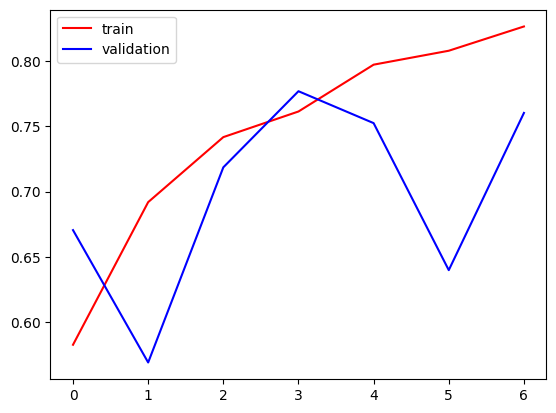

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

<h5>
The model is overfitting, as there is a significant gap between training and validation accuracy.
While training accuracy reaches approximately 99%, validation accuracy remains around 70–75%, indicating poor generalization.
</h5>


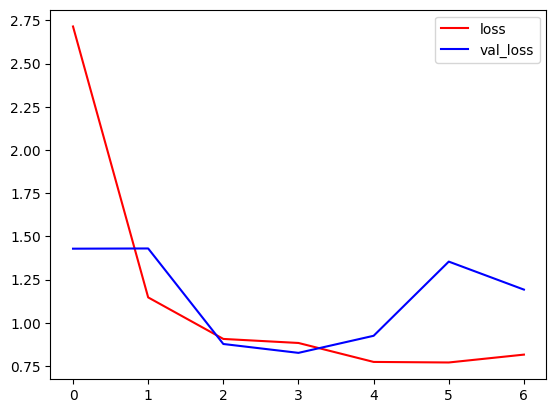

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='loss')
plt.plot(history.history['val_loss'],color='blue',label='val_loss')
plt.legend()
plt.show()

<h5>
The model shows clear signs of overfitting based on the loss curves.
Although the training loss decreases steadily with each epoch, the validation loss increases after a certain point.
This divergence indicates that the model is learning the training data too well but performing poorly on validation data, resulting in poor generalization.
</h5>


<h3>Ways to Reduce Overfitting</h3>
<ul>
  <li>Dropout</li>
  <li>Collect More Data</li>
  <li>Data Augmentation</li>
  <li>L1/L2 Regularization</li>
  <li>Batch Normalization</li>
  <li>Reduce Model Complexity</li>
</ul>


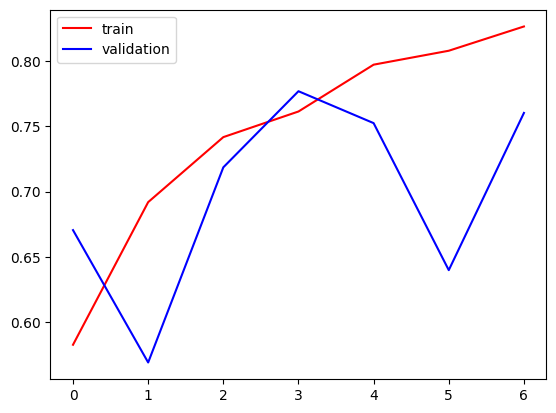

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

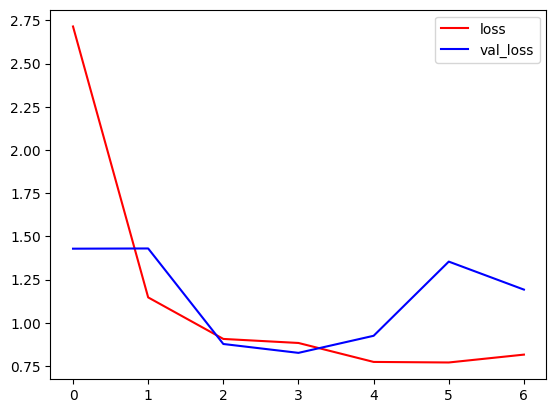

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='loss')
plt.plot(history.history['val_loss'],color='blue',label='val_loss')
plt.legend()
plt.show()

<h4>Now check the prediction of model with new unseen input image</h4>

In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/Cat_November_2010-1a.jpg')

In [ ]:
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

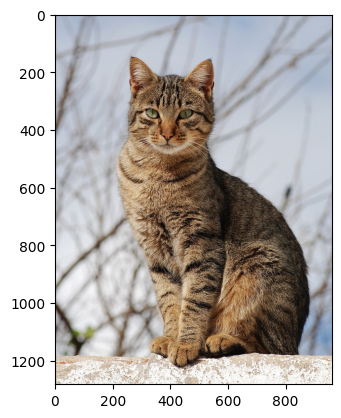

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1282, 960, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_img.shape

(256, 256, 3)

In [ ]:
test_input=test_img.reshape((1,256,256,3))

In [ ]:
res1=model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Below Image is of Cat


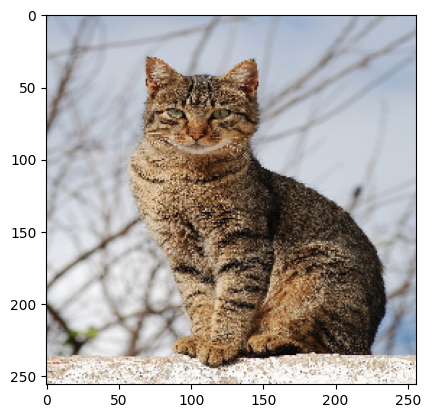

In [ ]:
plt.imshow(test_img)

if res1[0][0] > 0.5:
    print('Below Image is of Dog')
else:
    print('Below Image is of Cat')